In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import scipy as sc

In [97]:
file = r"C:\Repositorios\Simulacao_MIT\Classificador\MLP\dataset\csv_files\Falha_1B_csv\b000c30c000b1.csv"

In [98]:
df = pd.read_csv(file, usecols = ["a", "b", "c"])
df

,a,b,c
0,-1.027679,0.544434,-0.338898
1,-1.301575,0.486145,-0.194397
2,-1.057434,0.785217,-0.183716
3,-1.119385,0.678711,-0.169067
4,-1.147461,0.590820,-0.213623
...,...,...,...
99995,-1.255341,-1.081848,1.361084
99996,-1.215057,-0.871582,1.358643
99997,-1.255951,-1.121979,1.292114
99998,-1.372681,-1.233673,1.305542


Frequencia de operação:  [30.2]
Freq mínima:  29.79532
Freq máxima:  23.827799999999996


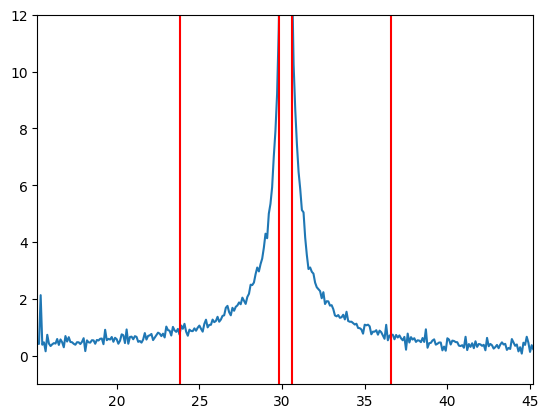

In [99]:
signal  = df.a[0:100000]
fft_fs = 10000
fft_Ts = 1/fft_fs

fft = np.fft.fft(signal, norm = "ortho")
fft = fft[range(int(len(signal)/2))]

tpCount = len(signal)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/fft_fs
freq = values/timePeriod

#Achar a frequencia fundamental 
max_index = np.where(abs(fft) == np.amax(abs(fft[100:])))
com_freq = freq[max_index]
print("Frequencia de operação: ", com_freq)

#Verificar a faixa de busca pela componente 
s = 0.67 / 100
s2 = 10.55 / 100
fbqnmin = (1 - 2*1*s)*com_freq[0]
fbqnmax = (1 - 2*1*s2)*com_freq[0]
fbqpmin = (1 + 2*1*s)*com_freq[0]
fbqpmax = (1 + 2*1*s2)*com_freq[0]
print("Freq mínima: ", fbqnmin)
print("Freq máxima: ", fbqnmax)
zoom =  15
plt.plot(freq, abs(fft))
plt.axvline(x = fbqnmin, color = 'r')
plt.axvline(x = fbqnmax, color = 'r')
plt.axvline(x = fbqpmin, color = 'r')
plt.axvline(x = fbqpmax, color = 'r')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

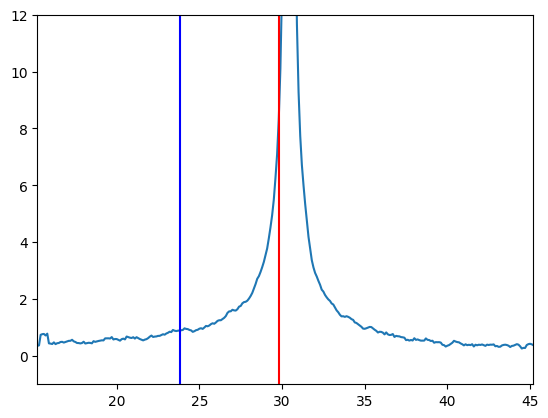

In [100]:
fft_df = pd.DataFrame(abs(fft), columns = ["a"])
# fft_df = fft_df.rolling(30).mean()
y = fft_df.a.rolling(5).mean()
y
plt.plot(freq, y)
plt.axvline(x = fbqnmin, color = 'r')
plt.axvline(x = fbqnmax, color = 'b')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [101]:
fft_df.a

0        156.544439
1          0.439741
2          0.197626
3          0.360432
4          0.249200
            ...    
49995      0.127897
49996      0.133941
49997      0.077494
49998      0.046575
49999      0.044032
Name: a, Length: 50000, dtype: float64

In [102]:
#Algoritmo para busca das componentes de frequencia 
fbqnmin
fbqnmax
com_freq
var = 0
store_freq_n = [0]
store_value_n = [0]
f_passado = round(fbqnmin,1)
count = 0
f_atual = round(fbqnmin,1)
while(f_atual >= fbqnmax):
    f_atual = f_passado - 0.1
    test = y[int(f_atual*10)] - y[int(f_passado*10)]
    if(test > 0):
        count = count + 1
    else:
        if(var):
            store_freq_n.append(f_passado)
            store_value_n.append(y[int(f_passado*10)])
            var = 0
        count = 0
    if(count == 3):
        var = 1
    f_passado = f_atual
    



In [103]:
store_freq_n

[0, 24.19999999999992]

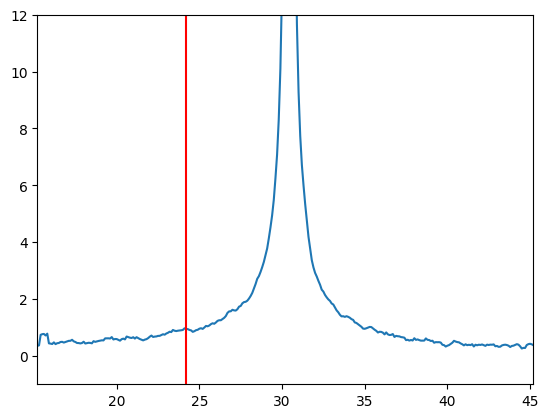

In [104]:
plt.plot(freq, y)
for i in range(len(store_freq_n)-1):
    plt.axvline(x = store_freq_n[i+1], color = 'r')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [105]:
#Algoritmo para busca das componentes de frequencia 
var = 0
store_freq_p = [0]
store_value_p = [0]
f_passado = round(fbqpmin,1)
count = 0
f_atual = round(fbqpmin,1)
while(f_atual <= fbqpmax):
    f_atual = f_passado + 0.1
    # test = fft_df.a[int(f_atual*10)] - fft_df.a[int(f_passado*10)]
    test = y[int(f_atual*10)] - y[int(f_passado*10)]
    if(test > 0):
        count = count + 1
    else:
        if(var):
            store_freq_p.append(f_passado)
            store_value_p.append(y[int(f_passado*10)])
            var = 0
        count = 0
    if(count == 3):
        var = 1
    f_passado = f_atual

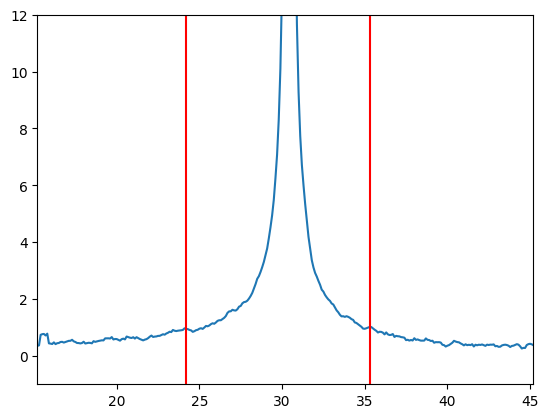

In [106]:
plt.plot(freq, y)
for i in range(len(store_freq_n)-1):
    plt.axvline(x = store_freq_n[i+1], color = 'r')
for i in range(len(store_freq_p)-1):
    plt.axvline(x = store_freq_p[i+1], color = 'r')     
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [107]:
max_freq_n = store_freq_n[store_value_n.index(max(store_value_n))]
max_freq_p = store_freq_p[store_value_p.index(max(store_value_p))]

print("Freq max pos = ", max_freq_p)
print("Freq max neg = ", max_freq_n)

Freq max pos =  35.30000000000007
Freq max neg =  24.19999999999992


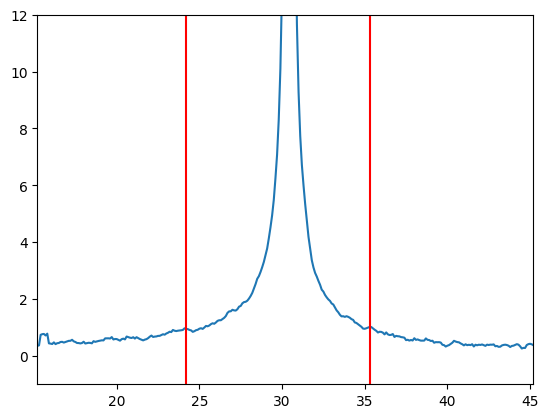

In [108]:
plt.plot(freq, y)
plt.axvline(x = max_freq_p, color = 'r')
plt.axvline(x = max_freq_n, color = 'r')     
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

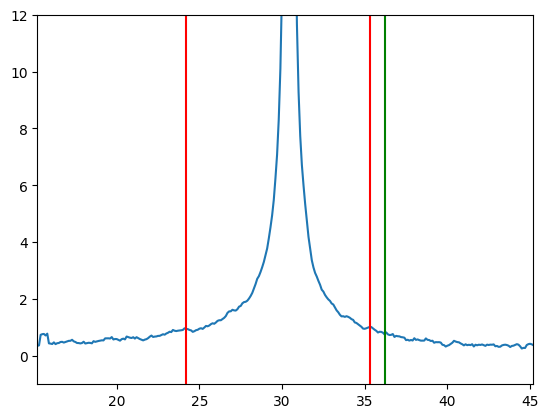

In [109]:
max_freq_p2 = com_freq + (com_freq - max_freq_n)
plt.plot(freq, y)
plt.axvline(x = max_freq_p, color = 'r')
plt.axvline(x = max_freq_n, color = 'r') 
plt.axvline(x = max_freq_p2, color = 'g')       
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

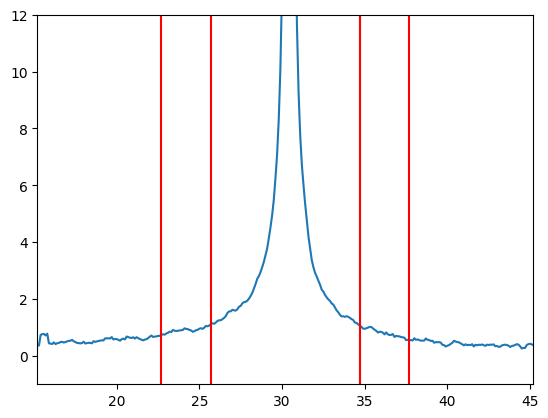

In [110]:
#Criando uma faixa com base na frequencia encontrada no passo anterior
max_freq_p2 = com_freq[0] + (com_freq[0] - max_freq_n)
plt.plot(freq, y)
plt.axvline(x = max_freq_n+1.5, color = 'r')
plt.axvline(x = max_freq_n-1.5, color = 'r')
# plt.axvline(x = max_freq_n, color = 'r') 
plt.axvline(x = max_freq_p2+1.5, color = 'r')    
plt.axvline(x = max_freq_p2-1.5, color = 'r')   
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [111]:
nfreq_range1 = max_freq_n-1.5
nfreq_range2 = max_freq_n+1.5
pfreq_range1 = max_freq_p2-1.5
pfreq_range2 = max_freq_p2+1.5

pfreq_range1

34.700000000000074

In [112]:
y

0              NaN
1              NaN
2              NaN
3              NaN
4        31.558288
           ...    
49995     0.089286
49996     0.095523
49997     0.106219
49998     0.091617
49999     0.085988
Name: a, Length: 50000, dtype: float64

In [113]:
nfreq_range1 = round(nfreq_range1,1)
nfreq_range2 = round(nfreq_range2,1)
pfreq_range1 = round(pfreq_range1,1)
pfreq_range2 = round(pfreq_range2,1)
ymax_n = max(y[int(nfreq_range1*10):int(nfreq_range2*10)])
print(ymax_n)
pfreq_range2
ymax_p = max(y[int(pfreq_range1*10):int(pfreq_range2*10)])
print(ymax_p)
# nfreq_range1 = round(nfreq_range1,1)

1.067123587192674
1.067176670653894


In [114]:
pfreq_range2

37.7

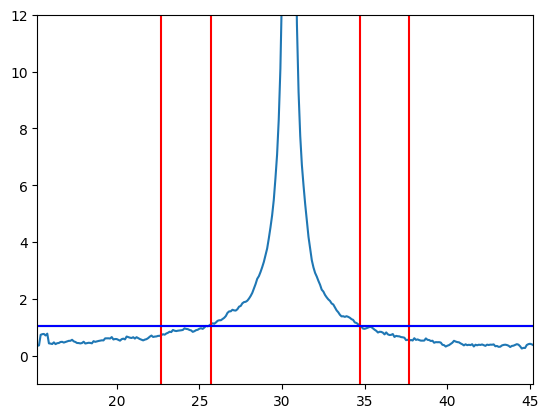

In [115]:
max_freq_p2 = com_freq[0] + (com_freq[0] - max_freq_n)
plt.plot(freq, y)
plt.axvline(x = max_freq_n+1.5, color = 'r')
plt.axvline(x = max_freq_n-1.5, color = 'r')
# plt.axvline(x = max_freq_n, color = 'r') 
plt.axvline(x = max_freq_p2+1.5, color = 'r')    
plt.axvline(x = max_freq_p2-1.5, color = 'r')
plt.axhline(y = ymax_n, color = 'g')
plt.axhline(y = ymax_p, color = 'b')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()